# Diabetes Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## loading and visualizing the dataset

In [2]:
dataframe = pd.read_csv("diabetes-dataset/diabetes.csv")

In [12]:
dataframe.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
333,12,106,80,0,0,23.6,0.137,44,0
195,5,158,84,41,210,39.4,0.395,29,1
82,7,83,78,26,71,29.3,0.767,36,0
88,15,136,70,32,110,37.1,0.153,43,1
16,0,118,84,47,230,45.8,0.551,31,1


In [15]:
dataframe.shape

(768, 9)

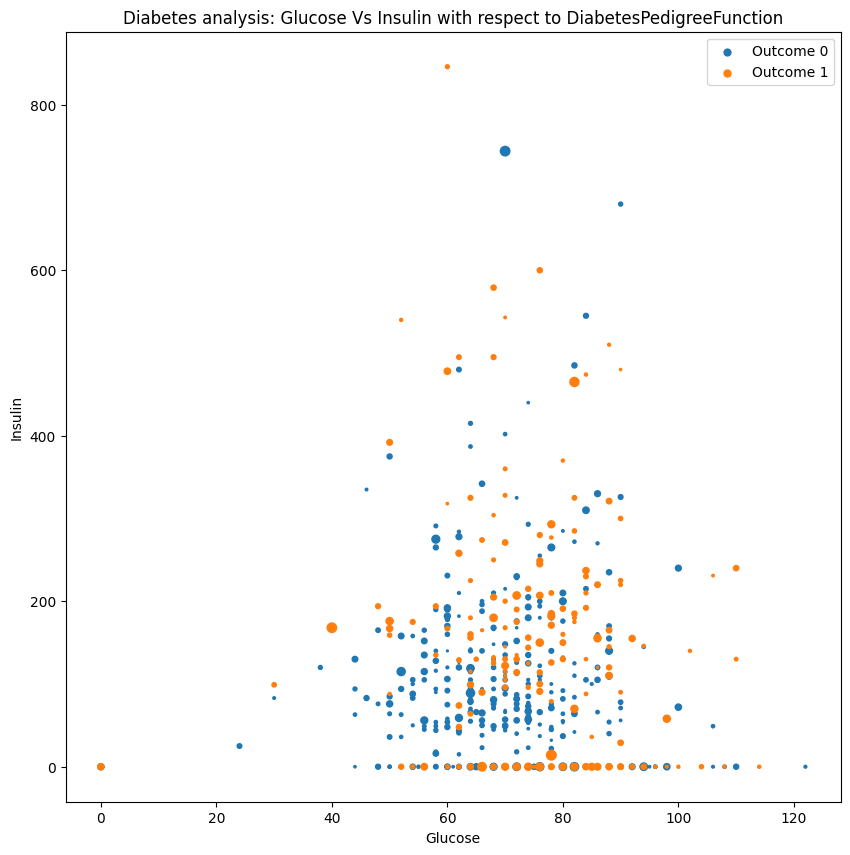

In [50]:
plt.figure(figsize=(10, 10))

for outcome_val, group in dataframe.groupby("Outcome"):
    plt.scatter(
        x="BloodPressure",
        y="Insulin",
        data=group,
        label=f"Outcome {outcome_val}",
        s=group["DiabetesPedigreeFunction"] * 20,
    )
plt.title(
    "Diabetes analysis: Glucose Vs Insulin with respect to DiabetesPedigreeFunction"
)
plt.legend()
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

## Feature Selection with Ridge(L2) and Lasso(L1)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [52]:
X = dataframe.drop("Outcome", axis=1)
y = dataframe["Outcome"]

In [53]:
# train test split
seed = 42
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [54]:
X_train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22


In [65]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [62]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
X_train_scaled

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]], shape=(614, 8))

In [67]:
# Model Training

# SECTION Ridge
ridge_model = LogisticRegression(penalty='l2', C=1, solver='liblinear')
ridge_model.fit(X_train_scaled, y_train)
print("Ridge: \n", classification_report(y_test, ridge_model.predict(X_test_scaled)))

# SECTION Lasso
lasso_model = LogisticRegression(penalty='l1', C=1, solver='liblinear')
lasso_model.fit(X_train_scaled, y_train )
print("Lasso: \n", classification_report(y_test, lasso_model.predict(X_test_scaled)))

Ridge: 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Lasso: 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [73]:
# lasso_model.get_params()

# get coefficients

coef = lasso_model.coef_[0]
coef

array([ 0.20513398,  1.06174887, -0.23228814,  0.02624409, -0.18405111,
        0.77120514,  0.22160271,  0.41172278])

In [75]:
features = X_train.columns

In [87]:
selected_features = pd.DataFrame(
    {
        "Features": features,
        "Coefficients": coef
    }
)
print("Featuers Selected by Lasso: \n");
print(selected_features)

Featuers Selected by Lasso: 

                   Features  Coefficients
0               Pregnancies      0.205134
1                   Glucose      1.061749
2             BloodPressure     -0.232288
3             SkinThickness      0.026244
4                   Insulin     -0.184051
5                       BMI      0.771205
6  DiabetesPedigreeFunction      0.221603
7                       Age      0.411723


In [88]:
selected_features.sort_values(by='Coefficients', ascending=False, key=abs, inplace=True) # according to absolute importance

In [89]:
selected_features

,Features,Coefficients
1,Glucose,1.061749
5,BMI,0.771205
7,Age,0.411723
2,BloodPressure,-0.232288
6,DiabetesPedigreeFunction,0.221603
0,Pregnancies,0.205134
4,Insulin,-0.184051
3,SkinThickness,0.026244


In [95]:
# !pip install seaborn
import seaborn as sns

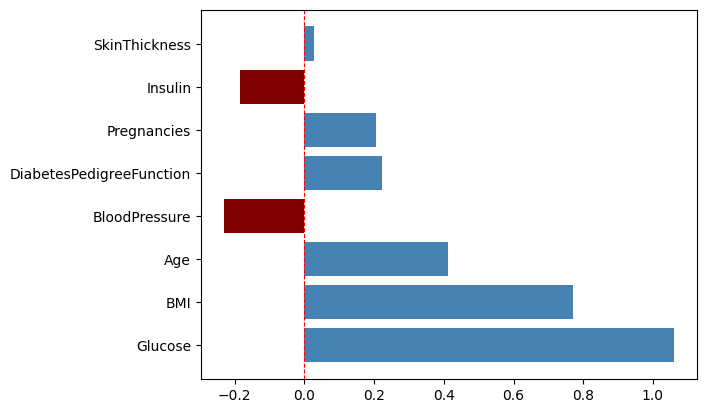

In [ ]:
# Horizontal Bar Plot to Visualize Feature Selection
colors = ["steelblue" if c > 0 else "maroon" for c in selected_features["Coefficients"]]
# plt.figure(figsize=(4,4))
plt.barh(selected_features["Features"],selected_features["Coefficients"], data=selected_features, color=colors)
plt.axvline(x=0, color="r", linestyle="--", linewidth=0.8)
plt.show()

# NOTE Horizontal bar plot draws first item on bottom. If we want it on top then => reverse everything with [::-1]